<a href="https://colab.research.google.com/github/Nadhifxfx/Histogram-Equalization/blob/main/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving tes foto.jpg to tes foto.jpg


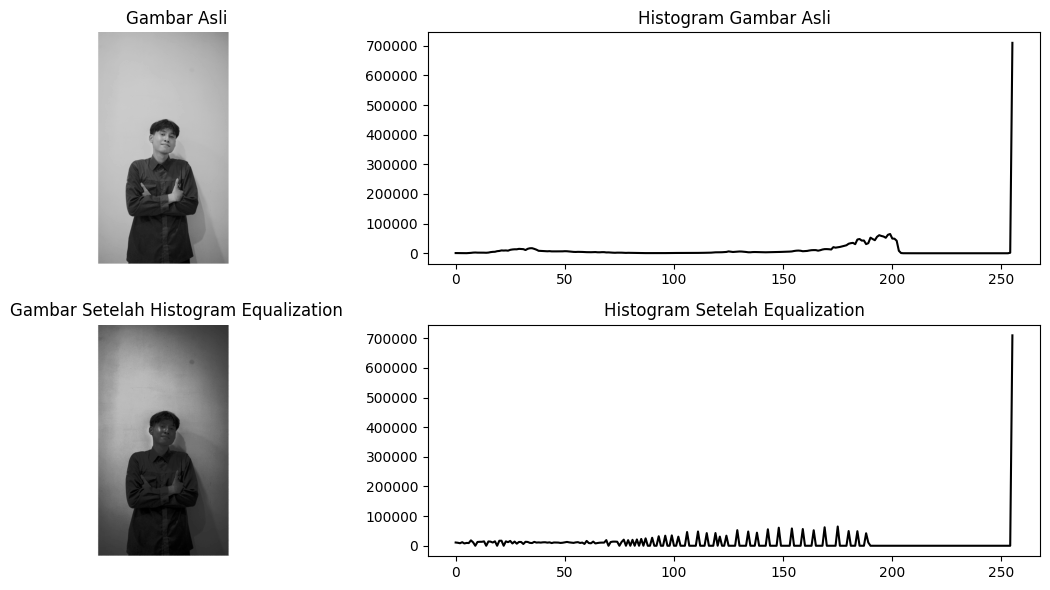

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Unggah gambar
uploaded = files.upload()

# Membaca file yang diunggah
for filename in uploaded.keys():
    # Membuka gambar dan mengubahnya ke skala abu-abu
    img = Image.open(io.BytesIO(uploaded[filename])).convert('L')  # 'L' untuk skala abu-abu
    gambar = np.array(img)
    tinggi, lebar = gambar.shape

    # Inisialisasi histogram untuk intensitas sebelum dan sesudah equalization
    h = np.zeros(256)
    h2 = np.zeros(256)

    # Hitung histogram dari gambar asli
    for i in range(lebar):
        for j in range(tinggi):
            h[gambar[j, i]] += 1

    # Hitung CDF (Cumulative Distribution Function) untuk histogram equalization
    cdf = h.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Terapkan histogram equalization menggunakan CDF
    gambar_equalized = cdf_normalized[gambar]

    # Hitung histogram dari gambar setelah equalization
    for i in range(lebar):
        for j in range(tinggi):
            h2[gambar_equalized[j, i]] += 1

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))

    # Tampilkan gambar asli
    plt.subplot(2, 2, 1)
    plt.imshow(gambar, cmap='gray')
    plt.title("Gambar Asli")
    plt.axis("off")

    # Tampilkan histogram gambar asli
    plt.subplot(2, 2, 2)
    plt.plot(h, color='black')
    plt.title("Histogram Gambar Asli")

    # Tampilkan gambar setelah equalization
    plt.subplot(2, 2, 3)
    plt.imshow(gambar_equalized, cmap='gray')
    plt.title("Gambar Setelah Histogram Equalization")
    plt.axis("off")

    # Tampilkan histogram gambar setelah equalization
    plt.subplot(2, 2, 4)
    plt.plot(h2, color='black')
    plt.title("Histogram Setelah Equalization")

    plt.tight_layout()
    plt.show()
